# PyEmittance Measurement

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0, '/usr/local/lcls/tools/python/toolbox')

In [3]:
from pyemittance import PyEmittance
import numpy as np
from epics import caget, caput
import os
import matplotlib.pyplot as plt
import json
from glob import glob

root_dir = os.getcwd()
root_dir

'/home/physics3/cmayes/2022-12-05'

In [4]:
# Run this cell only ONCE!!

#os.mkdir('bg_images') 
#
#os.mkdir('data_saving') 
#os.chdir('data_saving') 
#
#os.mkdir('saved_fits')
#os.mkdir('saved_images')
#os.mkdir('monitoring')
#os.mkdir('summaries')
#os.mkdir('raw_saves')
#os.mkdir('emit_saves')
#os.mkdir('mon_saves')
#os.mkdir('xopt_saves')

#os.chdir('..') 

In [5]:
!pwd

/home/physics3/cmayes/2022-12-05


In [6]:
# Check all directories exist

image_path = root_dir+'/bg_images/'
assert os.path.exists(image_path)

dict_saves = {
 'fits':       root_dir+'/data_saving/saved_fits/',
 'images':     root_dir+'/data_saving/saved_images/',
 'monitoring': root_dir+'/data_saving/monitoring/',
 'summaries':  root_dir+'/data_saving/summaries/',
 'raw_saves':  root_dir+'/data_saving/raw_saves/',
 'emit_saves': root_dir+'/data_saving/emit_saves/',
 'mon_saves':  root_dir+'/data_saving/mon_saves/',
 'xopt_saves': root_dir+'/data_saving/xopt_saves/'
             }

for key in dict_saves:
    assert os.path.exists(dict_saves[key])

In [55]:
#meas = PyEmittance(config_name='LCLS2_DIAG0', online=True)

meas = PyEmittance(config_name='LCLS2_OTR3', online=True)

#meas.quad_init = [-3.0, -2.5, -2.0, -1.5, -1.0, -0.5]

#meas.quad_init = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]
#meas.quad_init = [1.0, 2.0, 3.0, 4.0, 5.0]
#meas.quad_init = [-2.7, -2.5,-2.0, -1.5]

meas.quad_init = list(np.linspace(-2.6, -1.8, 7))
#meas.quad_init = list(np.linspace(-2.2, -1.75, 7))

meas.add_pnts = True
meas.num_points = 7   # only matters if adapt_ranges is used.
meas.adapt_ranges = True  # If helping, will ensure there are at least 7 total points
meas.check_sym = True
meas.infl_check = True


# Turning this off will ignore "quad_tol"
meas.use_prev_meas = False

meas.config_dict['savepaths'] = dict_saves
meas.config_dict['img_proc']['subtract_bg'] = True


meas.config_dict['img_proc']['n_to_acquire']=3
meas.save_runs = True
meas.calc_bmag = True # SET THIS TO FALSE IF TWISS0 NOT UPDATED

# Put the correct file location of the Background Image

image_file_name = "img_avg_2022-12-06_01-27-49-373064.npy"  ### CHANGE THIS!!! <----------
bg_file_name = image_path + image_file_name

assert os.path.exists(bg_file_name)

meas.config_dict['img_proc']['background_im']=bg_file_name

In [34]:
caget("QUAD:HTR:120:BCTRL")

-2.534934796662445

In [57]:
q0 = caget("QUAD:HTR:120:BCTRL")
q0

-2.7

In [58]:
caput("QUAD:HTR:120:BCTRL", q0)
q0

-2.7

In [11]:
#caput("QUAD:HTR:120:BCTRL", q0)

Running online!
2022-12-06_01-42-39-903647
2022-12-06_01-42-40-815182
2022-12-06_01-42-41-726052
2022-12-06_01-42-44-602031
2022-12-06_01-42-45-537990
2022-12-06_01-42-46-458237
2022-12-06_01-42-49-407135
2022-12-06_01-42-50-321307
2022-12-06_01-42-51-236131
2022-12-06_01-42-54-262192
2022-12-06_01-42-55-202956
2022-12-06_01-42-56-146228
2022-12-06_01-42-59-150785
2022-12-06_01-43-00-099346
2022-12-06_01-43-01-035092
2022-12-06_01-43-04-932338
2022-12-06_01-43-05-894300
2022-12-06_01-43-06-820897
2022-12-06_01-43-09-979054
Beam params out of bounds in image 0 out of 3 samples
2022-12-06_01-43-10-899014
2022-12-06_01-43-11-937915
Beam params out of bounds in image 2 out of 3 samples
2022-12-06_01-43-14-896681
2022-12-06_01-43-15-816529
2022-12-06_01-43-16-750774
2022-12-06_01-43-19-634006
2022-12-06_01-43-20-555916
2022-12-06_01-43-21-483503
2022-12-06_01-43-24-453194
2022-12-06_01-43-25-392282
2022-12-06_01-43-26-319595
2022-12-06_01-43-29-275688
2022-12-06_01-43-30-208844
2022-12-06_0

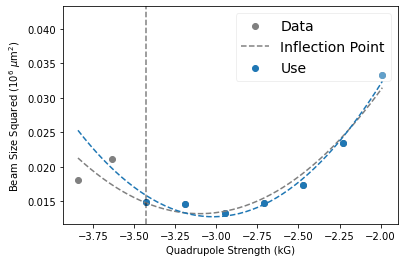

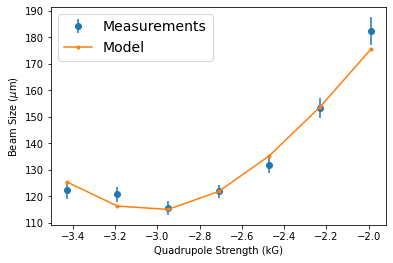

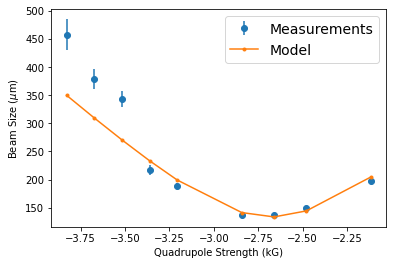

1

In [59]:
meas.online = True

# if no background image, just don't do background subtraction
meas.config_dict['img_proc']['subtract_bg'] = True

q0 = caget("QUAD:HTR:120:BCTRL")
  
res = meas.measure_emittance()

caput("QUAD:HTR:120:BCTRL", q0)

In [60]:
res['norm_emit_x'], res['norm_emit_y']

(4.578498570645569e-07, 5.358187801506675e-07)

In [61]:
from glob import glob
jsonfile1 = [os.path.basename(x) for x in sorted(glob( "./data_saving/saved_fits/pyemittance_data_*.json"))][-1]
jsonfile1

'pyemittance_data_2022-12-06_01-44-52-392691.json'

In [62]:
root = '/home/physics3/cmayes/2022-12-05'

In [63]:
res[f'quadvalsx']

[-3.4298696611367263,
 -3.1898728589471226,
 -2.949876056757517,
 -2.7098792545679125,
 -2.4698824523783083,
 -2.2298856501887037,
 -1.989888847999099]

TypeError: '<=' not supported between instances of 'numpy.ndarray' and 'str'

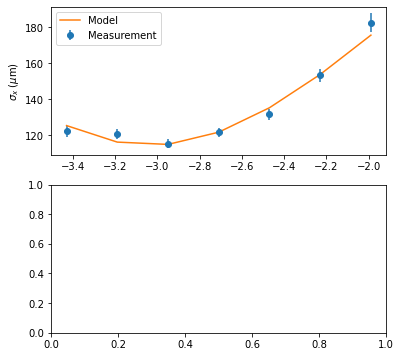

In [66]:
def plot_emittance_data(data, jsonfile):
    fig, axes = plt.subplots(2, figsize=(6,6))
    for ix, dim in enumerate(['x', 'y']):
        ax = axes[ix]
        
        if dim == 'x':
            key2 = 'screen_sigma_11'
        else:
            key2 = 'screen_sigma_33'
        ylabel = rf'$\sigma_{dim}$ ($\mu$m)'
        ax.errorbar(data[f'quadvals{dim}'], 1e6*np.array(data[f'beamsizes{dim}']),
                    yerr=1e6*np.array(data[f'beamsizeserr{dim}']), fmt='o', label='Measurement' )
        ax.plot(    data[f'quadvals{dim}'],  1e6*np.sqrt(data[key2]),  label='Model')
        ax.set_ylabel(ylabel)
        ax.legend()
    axes[1].set_xlabel('Quad Strength (kG*m)')
    axes[0].set_title(f'PyEmittance {jsonfile}')
    plotfile = os.path.join(root, os.path.splitext(jsonfile)[0] + '-meas.png')   
    plt.savefig(plotfile)
    return plotfile

plot_emittance_data(res, jsonfile1) 

In [ ]:
def info_text(data, jsonfile=''):

    text = f"""
    PyEmittance Measurement
    -----------------------
    
    sc_inj OTR0H04
    {jsonfile}
    
    Emittance x: {data['norm_emit_x']/1e-6:.3f} +/- {data['norm_emit_x_err']/1e-6:.3f} mm mrad
    Emittance y: {data['norm_emit_y']/1e-6:.3f} +/- {data['norm_emit_y_err']/1e-6:.3f} mm mrad
    
    Before scanning quad:
                    x        y
    norm_emit  {data['norm_emit_x']/1e-6:8.2f}  {data['norm_emit_y']/1e-6:8.2f} (mm-mrad)                    
    beta       {data['beta_x']:8.2f}  {data['beta_y']:8.2f} (m)
    alpha      {data['alpha_x']:8.2f}  {data['alpha_y']:8.2f} (1)

    
    """
    
    return text    
    
attachment = plot_emittance_data(res, jsonfile1)    
entry_text = info_text(res, jsonfile1)
print(entry_text)

In [65]:
import physicselog
assert os.path.exists(attachment)

physicselog.submit_entry('lcls2', username='PyEmittance', title='Emittance Measurement ', entry_text=entry_text, attachment=attachment)

/tmp/2022-12-06T01:45:03-00


True

# Initial points 

In [22]:
import epics
from epics import caget_many
def caget_dict(pvlist):
    return dict(zip(pvlist, caget_many(pvlist)))

In [67]:
test_pvs =     {'QUAD:GUNB:212:1:BACT': 'CQ01B (kG)',
    'QUAD:GUNB:212:2:BACT': 'SQ01B (kG)',    
    'QUAD:GUNB:823:1:BACT': 'CQ02B (kG)',    
    'QUAD:GUNB:823:2:BACT': 'SC02B (kG)',
    'SOLN:GUNB:212:BACT': 'SOL1B strength kG*m',
    'SOLN:GUNB:823:BACT': 'SOL2B strength kG*m',
    "QUAD:HTR:120:BCTRL": ''
    }
caget_dict(test_pvs)

{'QUAD:GUNB:212:1:BACT': 0.0012497801393738996,
 'QUAD:GUNB:212:2:BACT': 0.0020049420335342726,
 'QUAD:GUNB:823:1:BACT': 0.0003880081330240336,
 'QUAD:GUNB:823:2:BACT': 0.000330727303638696,
 'SOLN:GUNB:212:BACT': 0.043285030813024414,
 'SOLN:GUNB:823:BACT': 0.024405863149830107,
 'QUAD:HTR:120:BCTRL': -2.7}

In [24]:
# Good values
INITIAL_VARIABLES = {'QUAD:GUNB:212:1:BACT': 0.0009944871385117726,
 'QUAD:GUNB:212:2:BACT': 0.0021005539784122946,
 'QUAD:GUNB:823:1:BACT': 0.00013170186013684057,
 'QUAD:GUNB:823:2:BACT': 0.000103297911652342,
 'SOLN:GUNB:212:BACT': 0.043984256616023745,
 'SOLN:GUNB:823:BACT': 0.024803663316553967,
 'QUAD:HTR:120:BCTRL': -2.0}


OLD_INITIAL_VARIABLES = {'QUAD:GUNB:212:1:BACT': 0.0009913978739450751,
 'QUAD:GUNB:212:2:BACT': 0.0020990085813170217,
 'QUAD:GUNB:823:1:BACT': 0.0001305887748331745,
 'QUAD:GUNB:823:2:BACT': 0.00010046811135418729,
 'SOLN:GUNB:212:BACT': 0.044383597628357876,
 'SOLN:GUNB:823:BACT': 0.0250733840088283,
"QUAD:HTR:120:BCTRL": -1.9924172  ,           
                    
                    }

BEST_VARIABLES ={'QUAD:GUNB:212:1:BACT': 0.000995260157397889,
 'QUAD:GUNB:212:2:BACT': 0.002100295004764271,
 'QUAD:GUNB:823:1:BACT': 0.0001320632794359453,
 'QUAD:GUNB:823:2:BACT': 0.0001043264190099633,
 'SOLN:GUNB:212:BACT': 0.04329987587227898,
 'SOLN:GUNB:823:BACT': 0.02440285125779409,
 'QUAD:HTR:120:BCTRL': -2.534934796662445}

BEST_AFTER_SKEW = {'QUAD:GUNB:212:1:BACT': 0.0012497801393738996,
 'QUAD:GUNB:212:2:BACT': 0.0020049420335342726,
 'QUAD:GUNB:823:1:BACT': 0.0003880081330240336,
 'QUAD:GUNB:823:2:BACT': 0.000330727303638696,
 'SOLN:GUNB:212:BACT': 0.043285030813024414,
 'SOLN:GUNB:823:BACT': 0.024405863149830107,
 'QUAD:HTR:120:BCTRL': -2.7}

 

In [53]:
# Reset to good 
def reset(settings=INITIAL_VARIABLES):
    for k, v in settings.items():
        k = k.replace('BACT', 'BCTRL')
        print(f'caput {k} {v}')
        epics.caput(k,v)
reset(BEST_VARIABLES)

caput QUAD:GUNB:212:1:BCTRL 0.000995260157397889
caput QUAD:GUNB:212:2:BCTRL 0.002100295004764271
caput QUAD:GUNB:823:1:BCTRL 0.0001320632794359453
caput QUAD:GUNB:823:2:BCTRL 0.0001043264190099633
caput SOLN:GUNB:212:BCTRL 0.04329987587227898
caput SOLN:GUNB:823:BCTRL 0.02440285125779409
caput QUAD:HTR:120:BCTRL -2.534934796662445


# Evaluate function

In [28]:
pvinfo = {
    'MIRR:LGUN:820:M3_MOTR_H': 'laser mirror horizontal in mm',
    'MIRR:LGUN:820:M3_MOTR_V': 'laser mirror vertical in mm',
    'OSC:LGUN:100:PHASE_SWEEP': 'laser timing in ps',
    'LASR:LGUN:220:LASER_PWR_CTRL': 'laser power',
    
    'GUN:GUNB:100:AACT': 'gun gradient',
    'GUN:GUNB:100:PACT': 'gun phase',
    'BPMS:GUNB:314:X': '',
    'BPMS:GUNB:314:Y': '',
    'BPMS:GUNB:314:TMIT': '',
    'QUAD:GUNB:212:1:BACT': 'CQ01B (kG)',
    'QUAD:GUNB:212:2:BACT': 'SQ01B (kG)',    
    'QUAD:GUNB:823:1:BACT': 'CQ02B (kG)',    
    'QUAD:GUNB:823:2:BACT': 'SC02B (kG)',
    'SOLN:GUNB:212:BACT': 'SOL1B strength kG*m',
    'SOLN:GUNB:823:BACT': 'SOL2B strength kG*m',
    'BPMS:GUNB:314:FW:CHRG_SLOW': 'charge readback pC'
}

pvread = list(pvinfo)
caget_dict(pvread)

{'MIRR:LGUN:820:M3_MOTR_H': 4.068500000000001,
 'MIRR:LGUN:820:M3_MOTR_V': 2.2724999999999995,
 'OSC:LGUN:100:PHASE_SWEEP': 814427.702860398,
 'LASR:LGUN:220:LASER_PWR_CTRL': 0.5,
 'GUN:GUNB:100:AACT': 0.75122810144033,
 'GUN:GUNB:100:PACT': -47.0426675389336,
 'BPMS:GUNB:314:X': -0.2738758325576782,
 'BPMS:GUNB:314:Y': -1.6049879789352417,
 'BPMS:GUNB:314:TMIT': 289424288.0,
 'QUAD:GUNB:212:1:BACT': 0.0009955159563747493,
 'QUAD:GUNB:212:2:BACT': 0.002100295004764271,
 'QUAD:GUNB:823:1:BACT': 0.0001325832779050267,
 'QUAD:GUNB:823:2:BACT': 0.00010586918004639523,
 'SOLN:GUNB:212:BACT': 0.04328354711786134,
 'SOLN:GUNB:823:BACT': 0.024405863149830107,
 'BPMS:GUNB:314:FW:CHRG_SLOW': 50.6591796875}

In [29]:
def merit(data):    
    
    output = {}
    # Add any scalars
    for k, v in data.items():
        if np.isscalar(v):
            output[k] = v
    output['sqrt_norm_emit_xy'] = np.sqrt(data['norm_emit_x']*data['norm_emit_y'])

    return output


#merit(res)

In [37]:
caget("QUAD:HTR:120:BCTRL")

-2.534934796662445

In [38]:
caput("QUAD:HTR:120:BCTRL", q0)   

1

In [39]:
%%time
def evaluate_emittance(pvset_dict):
    for k, v in pvset_dict.items():
        rbv = epics.caget(k)
        print(f'CAPUT {k} {v}')
        epics.caput(k, v)

        
    #output = caget_dict(pvread)        
        
    q0 = caget("QUAD:HTR:120:BCTRL")
    res = meas.measure_emittance()
    caput("QUAD:HTR:120:BCTRL", q0)        
    output = {}
    #output.update(caget_dict(pvread)     )
    output.update(merit(res))
    
    jsonfile = [os.path.basename(x) for x in sorted(glob( "./data_saving/saved_fits/pyemittance_data_*.json"))][-1]
    output['jsonfile'] = jsonfile
    
    #output['sqrt_norm_emit_xy'] = np.random.rand()
        
    return output
    
    
#inputs2 =  {'SOLN:GUNB:212:BACT': 0.0437,
# 'SOLN:GUNB:823:BACT': 0.024952834264468805}
#res2 = evaluate_emittance(inputs2)

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 10.5 µs


# Xopt YAML

In [40]:
from xopt import Xopt
import yaml
YAML = """
xopt: 
    dump_file: dump.yaml
    
evaluator:
  function: __main__.evaluate_emittance

generator:
  name: upper_confidence_bound
  acq:
    beta: 0.5
    monte_carlo_samples: 128
    # proximal_lengthscales: [-.1, -.1]
    use_transformed_proximal_weights: true
  model:
    kwargs:
      use_conservative_prior_lengthscale: false
      use_conservative_prior_mean: false
      use_low_noise_prior: false
  n_initial: 3
  
  optim:
    max_travel_distances: [0.5, 0.5, 0.5, 0.5] # Adjust!
    num_restarts: 1
    raw_samples: 50
    sequential: true
    use_nearby_initial_points: true
    
vocs:
  variables:
    # Tighter ranges
    #SOLN:GUNB:212:BCTRL: [0.042826,  0.044574]  # SOL1B (kG*m) 0.0437 nominal
    #SOLN:GUNB:823:BCTRL: [0.0245, 0.0255]  # SOL2B (kG*m)  0.025 nominal
    QUAD:GUNB:212:1:BCTRL: [-.005, .005]  # 'CQ01B (kG)',
    QUAD:GUNB:212:2:BCTRL: [-.005, .005]  # 'SQ01B (kG)',    
    QUAD:GUNB:823:1:BCTRL: [-.005, .005]  # 'CQ02B (kG)',    
    QUAD:GUNB:823:2:BCTRL: [-.005, .005]  # 'SC02B (kG)',

    
  objectives:
    sqrt_norm_emit_xy: 'MINIMIZE'    

"""
yaml.safe_load(YAML)

X=Xopt(YAML)

In [41]:
def nearby_points(initial_dict):
    output = {}
    for name, x0 in initial_dict.items():
        name = name.replace('BACT', 'BCTRL')
        #print(name)
        
        if name in X.vocs.variables:
            xmin, xmax = X.vocs.variables[name]
            
            ptp = xmax - xmin
            x1 = x0 + np.random.rand() * ptp * 0.05 # 5% of full range
            if x1 < xmin:
                x1 = xmin
            if x1 > xmax:
                x1 = xmax
            output[name] = x1
    return output
    
nearby_points(INITIAL_VARIABLES)    

{'QUAD:GUNB:212:1:BCTRL': 0.001310063637882162,
 'QUAD:GUNB:212:2:BCTRL': 0.0024572919433373227,
 'QUAD:GUNB:823:1:BCTRL': 0.00020722065770191136,
 'QUAD:GUNB:823:2:BCTRL': 0.00046683321022276015}

In [42]:
INITIAL_VARIABLES

{'QUAD:GUNB:212:1:BACT': 0.0009944871385117726,
 'QUAD:GUNB:212:2:BACT': 0.0021005539784122946,
 'QUAD:GUNB:823:1:BACT': 0.00013170186013684057,
 'QUAD:GUNB:823:2:BACT': 0.000103297911652342,
 'SOLN:GUNB:212:BACT': 0.043984256616023745,
 'SOLN:GUNB:823:BACT': 0.024803663316553967,
 'QUAD:HTR:120:BCTRL': -2.0}

In [43]:
inputs3 = [nearby_points(INITIAL_VARIABLES) for _ in range(3)]
inputs3

[{'QUAD:GUNB:212:1:BCTRL': 0.0010756616147485159,
  'QUAD:GUNB:212:2:BCTRL': 0.002160120042698598,
  'QUAD:GUNB:823:1:BCTRL': 0.0002926492522671338,
  'QUAD:GUNB:823:2:BCTRL': 0.0004058985428866834},
 {'QUAD:GUNB:212:1:BCTRL': 0.001411217261771231,
  'QUAD:GUNB:212:2:BCTRL': 0.0022286239098415384,
  'QUAD:GUNB:823:1:BCTRL': 0.0003786584240296271,
  'QUAD:GUNB:823:2:BCTRL': 0.0005996743687056683},
 {'QUAD:GUNB:212:1:BCTRL': 0.0014179962374432442,
  'QUAD:GUNB:212:2:BCTRL': 0.002288659663158285,
  'QUAD:GUNB:823:1:BCTRL': 0.0003585287301076072,
  'QUAD:GUNB:823:2:BCTRL': 0.00020873308108429077}]

In [ ]:
%%time
X.evaluate_data(inputs3)

In [ ]:
#reset()

In [49]:
X.generator.options.optim.max_travel_distances = [0.5, 0.5, 0.5, 0.5]

In [ ]:
#X.vocs.variables['SOLN:GUNB:823:BCTRL'] = [0.0244, 0.0255]

4
CAPUT QUAD:GUNB:212:1:BCTRL -0.00017915064788502137
CAPUT QUAD:GUNB:212:2:BCTRL 0.002356735792492939
CAPUT QUAD:GUNB:823:1:BCTRL -5.8598011579146195e-05
CAPUT QUAD:GUNB:823:2:BCTRL 0.00060103670869871
Running online!
2022-12-06_01-29-22-906845
2022-12-06_01-29-23-842851
2022-12-06_01-29-24-760351
2022-12-06_01-29-27-602201
2022-12-06_01-29-28-528878
2022-12-06_01-29-29-519294
Beam params out of bounds in image 2 out of 3 samples
2022-12-06_01-29-32-454186
2022-12-06_01-29-33-357471
2022-12-06_01-29-34-284898
Beam params out of bounds in image 2 out of 3 samples
2022-12-06_01-29-37-228659
2022-12-06_01-29-38-133395
2022-12-06_01-29-39-055912
2022-12-06_01-29-42-060825
Beam params out of bounds in image 0 out of 3 samples
2022-12-06_01-29-42-986962
Beam params out of bounds in image 1 out of 3 samples
2022-12-06_01-29-43-891729
Resampled 0 times, beam still out of bounds 

xrms 4.58 um, yrms 209.29 um (threshold: min_rms 60.60 um, max_rms 14140.00 um)
xamp 6065.43, yamp 2596.80 (amp_th

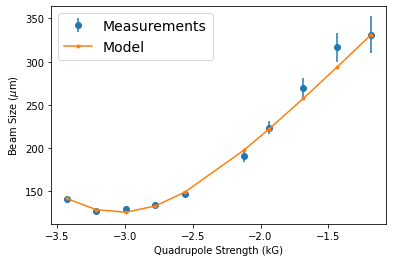

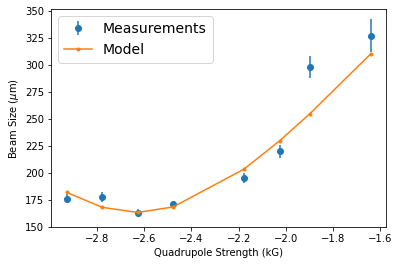

1     4.262777e-07
2     4.816144e-07
3     4.413315e-07
4     5.900198e-06
5     5.580299e-07
6     8.492409e-07
7     7.638231e-07
8     4.654890e-07
9     4.492581e-07
10    4.983787e-07
11    4.464801e-07
13             NaN
14             NaN
16    6.428760e-07
Name: sqrt_norm_emit_xy, dtype: float64 1     3.450860e-07
2     4.141893e-07
3     3.996521e-07
4     8.613015e-06
5     6.877820e-07
6     8.838316e-07
7     6.430584e-07
8     5.333375e-07
9     4.209696e-07
10    3.600092e-07
11    4.354763e-07
13             NaN
14             NaN
16    6.551586e-07
Name: norm_emit_x, dtype: float64 1     5.265720e-07
2     5.600154e-07
3     4.873575e-07
4     4.041829e-06
5     4.527559e-07
6     8.160040e-07
7     9.072670e-07
8     4.062718e-07
9     4.794475e-07
10    6.899303e-07
11    4.577620e-07
13             NaN
14             NaN
16    6.308236e-07
Name: norm_emit_y, dtype: float64
4
CAPUT QUAD:GUNB:212:1:BCTRL 0.0014005498735833724
CAPUT QUAD:GUNB:212:2:BCTRL 0.002571475027

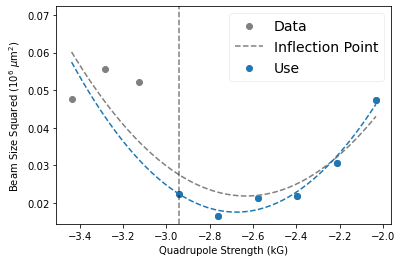

2022-12-06_01-34-00-180307
2022-12-06_01-34-01-113404
2022-12-06_01-34-02-056005


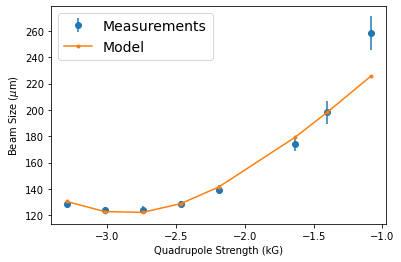

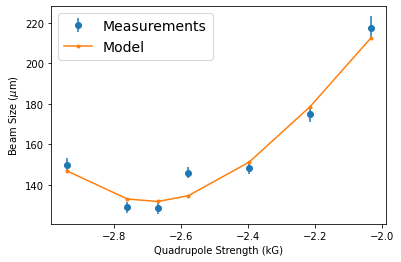

1     4.262777e-07
2     4.816144e-07
3     4.413315e-07
4     5.900198e-06
5     5.580299e-07
6     8.492409e-07
7     7.638231e-07
8     4.654890e-07
9     4.492581e-07
10    4.983787e-07
11    4.464801e-07
13             NaN
14             NaN
16    6.428760e-07
17    4.467609e-07
Name: sqrt_norm_emit_xy, dtype: float64 1     3.450860e-07
2     4.141893e-07
3     3.996521e-07
4     8.613015e-06
5     6.877820e-07
6     8.838316e-07
7     6.430584e-07
8     5.333375e-07
9     4.209696e-07
10    3.600092e-07
11    4.354763e-07
13             NaN
14             NaN
16    6.551586e-07
17    4.113438e-07
Name: norm_emit_x, dtype: float64 1     5.265720e-07
2     5.600154e-07
3     4.873575e-07
4     4.041829e-06
5     4.527559e-07
6     8.160040e-07
7     9.072670e-07
8     4.062718e-07
9     4.794475e-07
10    6.899303e-07
11    4.577620e-07
13             NaN
14             NaN
16    6.308236e-07
17    4.852274e-07
Name: norm_emit_y, dtype: float64
4
CAPUT QUAD:GUNB:212:1:BCTRL 0.00124

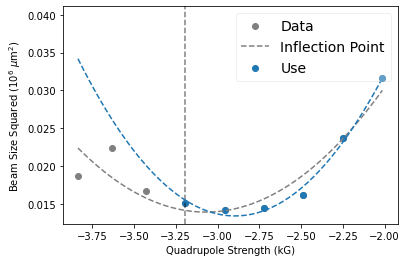

2022-12-06_01-36-04-772362
2022-12-06_01-36-05-716593
2022-12-06_01-36-06-666831


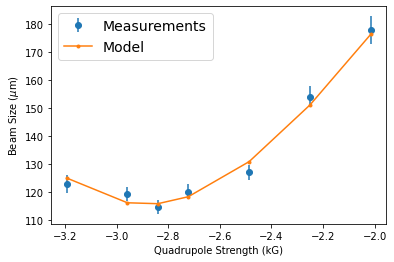

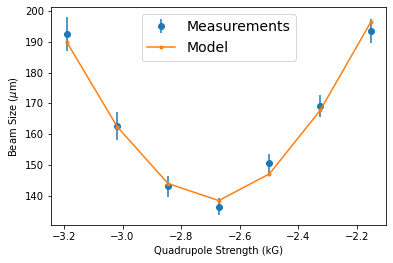

1     4.262777e-07
2     4.816144e-07
3     4.413315e-07
4     5.900198e-06
5     5.580299e-07
6     8.492409e-07
7     7.638231e-07
8     4.654890e-07
9     4.492581e-07
10    4.983787e-07
11    4.464801e-07
13             NaN
14             NaN
16    6.428760e-07
17    4.467609e-07
18    5.362840e-07
Name: sqrt_norm_emit_xy, dtype: float64 1     3.450860e-07
2     4.141893e-07
3     3.996521e-07
4     8.613015e-06
5     6.877820e-07
6     8.838316e-07
7     6.430584e-07
8     5.333375e-07
9     4.209696e-07
10    3.600092e-07
11    4.354763e-07
13             NaN
14             NaN
16    6.551586e-07
17    4.113438e-07
18    5.549928e-07
Name: norm_emit_x, dtype: float64 1     5.265720e-07
2     5.600154e-07
3     4.873575e-07
4     4.041829e-06
5     4.527559e-07
6     8.160040e-07
7     9.072670e-07
8     4.062718e-07
9     4.794475e-07
10    6.899303e-07
11    4.577620e-07
13             NaN
14             NaN
16    6.308236e-07
17    4.852274e-07
18    5.182057e-07
Name: norm_emi

In [56]:
%%time
for i in range(3):
    X.step()
    X.dump_state()
    print(X.data['sqrt_norm_emit_xy'], X.data['norm_emit_x'], X.data['norm_emit_y'])

In [ ]:
X.data['sqrt_norm_emit_xy']

In [ ]:
reset()

In [ ]:
fig, ax = plt.subplots()
for k in ('norm_emit_x', 'norm_emit_y'):
    ax.plot(X.data[k]*1e6, label=k, marker='x')
ax.set_ylabel('Measured emittance (mm-mrad)')
ax.set_xlabel('Xopt iteration')
plt.legend()
ax.set_ylim(0, None)

In [ ]:
X.dump_state()

In [ ]:
X.vocs

In [ ]:
!pwd